NLTK Sentiment Analysis 
=====================
 - Determining the sentiment or emotion expressed in a piece of text. 
 - The Natural Language Toolkit (NLTK) is one of the most popular Python libraries for building NLP applications, including sentiment analysis.
 
 #### Step 1: Installations

In [1]:
import nltk
nltk.download('twitter_samples') # dataset
nltk.download('stopwords')
nltk.download('punkt') # tokenize
nltk.download('wordnet') # lexical database of english - helps find conceptual relations.


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\vvyy3\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vvyy3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vvyy3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vvyy3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Step 2: Loading and Preprocessing Data**


In [2]:
from nltk.corpus import twitter_samples
import random

# Load twitter samples dataset
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine the datasets and create labels
tweets = positive_tweets + negative_tweets
labels = ['Positive'] * len(positive_tweets) + ['Negative'] * len(negative_tweets)

# Shuffle the dataset
combined = list(zip(tweets, labels))
random.shuffle(combined)
tweets, labels = zip(*combined)


**Tokenize**

In [3]:
from nltk.tokenize import word_tokenize

sample_text = "NLTK is a powerful library for NLP."
tokens = word_tokenize(sample_text)
print(tokens)


['NLTK', 'is', 'a', 'powerful', 'library', 'for', 'NLP', '.']


**Remove stopwords**

In [4]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

filtered_tokens = remove_stopwords(tokens)
print(filtered_tokens)


['NLTK', 'powerful', 'library', 'NLP', '.']


### Stemming and Lemmatization

Stemming and lemmatization are techniques for reducing words to their root forms. NLTK provides tools for both:

In [5]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print(stemmed_tokens)
print(lemmatized_tokens)


['nltk', 'power', 'librari', 'nlp', '.']
['NLTK', 'powerful', 'library', 'NLP', '.']


### Feature Extraction

We need to convert our text data into a format suitable for machine learning algorithms. One common approach is to use a bag-of-words model.
**FreqDist** is a class in NLTK that helps compute the frequency distribution of a given list of items (e.g., words). It returns the count of how often each word appears in the text.

The list comprehension collects all words from all tweets into a list called all\_words.

**FreqDist(all\_words)** counts how many times each word appears across all tweets.

**word\_features** now contains these 2000 words and will be used to check the presence of each word in each document (tweet).

The result is a list of tuples, where each tuple is (features, label), with features being the dictionary generated by document\_features() and label being the associated label for the tweet.

In [6]:
from nltk.probability import FreqDist

all_words = [word.lower() for tweet in tweets for word in word_tokenize(tweet)]
all_words_freq = FreqDist(all_words)

# Select the top 2000 words as features
word_features = list(all_words_freq.keys())[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    print(features)
    return features

# Create feature sets for training and testing
feature_sets = [(document_features(word_tokenize(tweet)), label) for (tweet, label) in zip(tweets, labels)]
train_set, test_set = feature_sets[1000:], feature_sets[:1000]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Building a Sentiment Analysis Model

We can use the Naive Bayes classifier, which is simple and effective for text classification tasks

In [7]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)


### Training and Evaluate the Model

To evaluate our model, we can use the accuracy metric:


In [8]:
import nltk.classify.util

accuracy = nltk.classify.util.accuracy(classifier, test_set)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.30%


In [9]:
classifier.show_most_informative_features(10)
# Display Informative features

Most Informative Features
             contains(() = True           Negati : Positi =     67.9 : 1.0
             contains()) = True           Positi : Negati =     66.7 : 1.0
           contains(sad) = True           Negati : Positi =     36.5 : 1.0
          contains(miss) = True           Negati : Positi =     20.0 : 1.0
          contains(glad) = True           Positi : Negati =     16.9 : 1.0
       contains(arrived) = True           Positi : Negati =     16.6 : 1.0
          contains(blog) = True           Positi : Negati =     15.6 : 1.0
         contains(loves) = True           Positi : Negati =     12.9 : 1.0
        contains(thanks) = True           Positi : Negati =     12.0 : 1.0
     contains(followers) = True           Positi : Negati =     10.9 : 1.0


### Using Pre-trained Sentiment Analyzers

NLTK also provides pre-trained sentiment analyzers, such as VADER (Valence Aware Dictionary and sEntiment Reasoner, which is designed for social media text:

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vvyy3\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
text = "NLTK is a great library for text processing!"
sentiment_scores = sid.polarity_scores(text)
print(sentiment_scores)


{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.6588}


In [12]:
# Classifying a new sentence using the trained classifier
test_sentence = "This is an amazing movie!"
test_features = document_features(word_tokenize(test_sentence))
classification = classifier.classify(test_features)
print(classification)


{'contains(i)': False, 'contains(met)': False, 'contains(a)': False, 'contains(new)': False, 'contains(kinds)': False, 'contains(of)': False, 'contains(people)': False, 'contains(,)': False, 'contains(classmate)': False, 'contains(set)': False, 'contains(friends)': False, 'contains(everything)': False, 'contains(was)': False, 'contains(for)': False, 'contains(me)': False, 'contains(.)': False, 'contains(but)': False, 'contains(dont)': False, 'contains(find)': False, 'contains(my)': False, 'contains(bestfriend)': False, 'contains(:)': False, 'contains(()': False, 'contains(``)': False, 'contains(@)': False, 'contains(nyesekkinn)': False, 'contains(do)': False, "contains(n't)": False, 'contains(be)': False, 'contains(affaraid)': False, "contains('ll)": False, 'contains(there)': False, 'contains(you)': False, 'contains())': False, "contains('')": False, 'contains(look)': False, 'contains(at)': False, 'contains(his)': False, 'contains(cheeks)': False, 'contains(so)': False, 'contains(squis

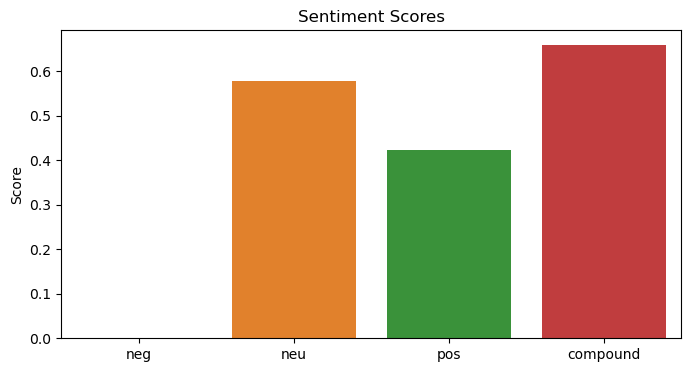

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Sentiment Scores
def plot_sentiment_scores(sentiment_scores):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sentiment_scores.keys()), y=list(sentiment_scores.values()))
    plt.title('Sentiment Scores')
    plt.ylabel('Score')
    plt.show()

plot_sentiment_scores(sentiment_scores)


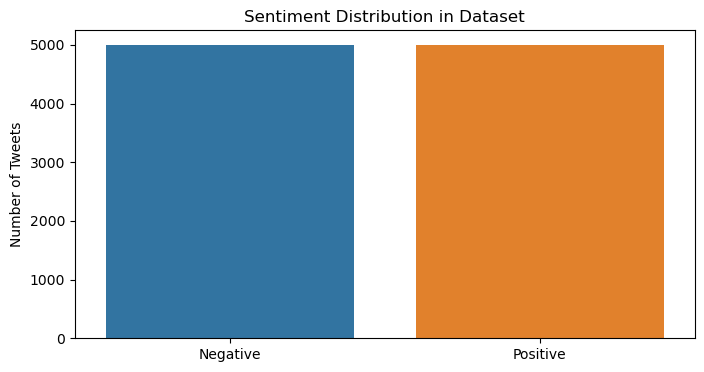

In [14]:
# Visualizing the Sentiment Distribution in the Dataset
def plot_sentiment_distribution(labels):
    sentiment_dist = FreqDist(labels)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sentiment_dist.keys()), y=list(sentiment_dist.values()))
    plt.title('Sentiment Distribution in Dataset')
    plt.ylabel('Number of Tweets')
    plt.show()

plot_sentiment_distribution(labels)


Applications of Sentiment Analysis
----------------------------------

Sentiment analysis has numerous applications across various domains:

1.  **Social Media Monitoring**: Analyzing public sentiment on social media platforms.
    
2.  **Customer Feedback Analysis**: Understanding customer opinions and improving products or services.
    
3.  **Market Research**: Gauging market sentiment towards a brand or product.
    
4.  **Political Analysis**: Analyzing public sentiment towards political events or figures.